In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [10]:
from pathlib import Path

import numpy as np
 
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

from matplotlib import rcParams

import themepy
theme = themepy.Theme('paper')

rcParams['font.family'] = 'Segoe Print'
rcParams['figure.dpi'] = 200



import diagram as dg
import colorhelp as ch

spath = Path("../deck/figures")

# https://photos.app.goo.gl/fDbayhbHXsmJ8aoh9
build on math diagram figs:
1. fig w/ two dots
1. two rows
1. backward arrow
2. line plot
2. backward arrow?
3. two rows -> two dots
3. equivariance-> two dots moved
4. maybe an appendix fig on what happens in V for equiv (throw back to S & K)

In [18]:
dtwo= [[('temp', 61), ('prcp', 0.47), ('name', 'LGA')], 
        [('temp', 49), ('prcp', 0.74), ('name', 'JFK')]]
x = np.array(dtwo).T[1][0].astype(float)
y = np.array(dtwo).T[1][1].astype(float)
c = np.array(dtwo).T[1][2]

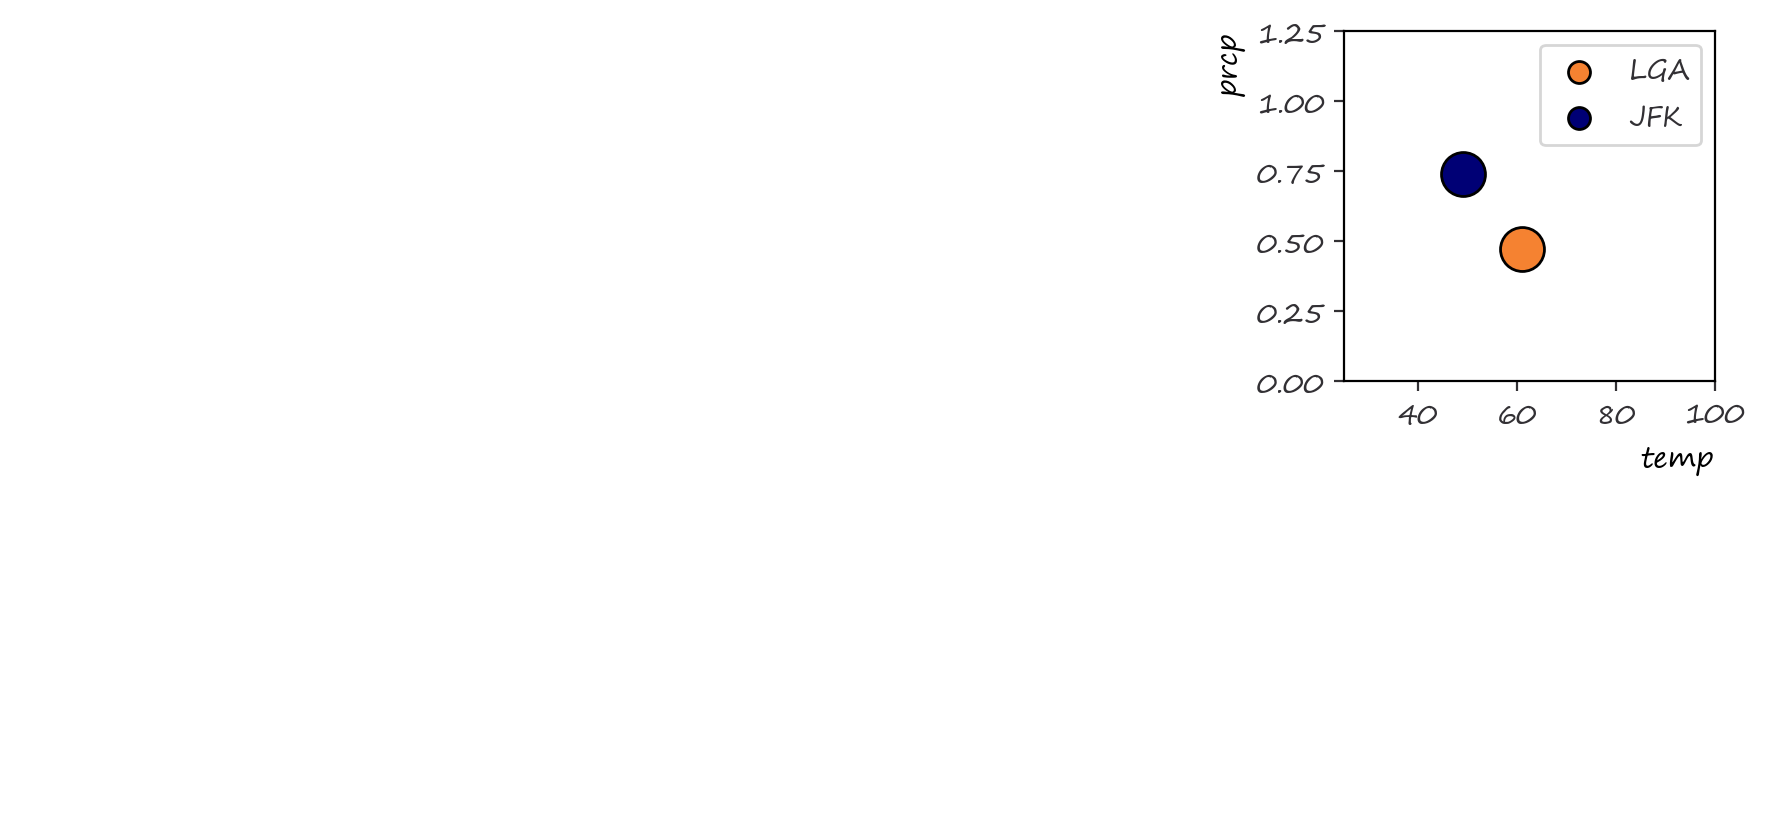

In [12]:
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', 
                          label=None)
fig.savefig(spath/"intro01.png", facecolor='white', bbox_inches='tight')


plt.show()

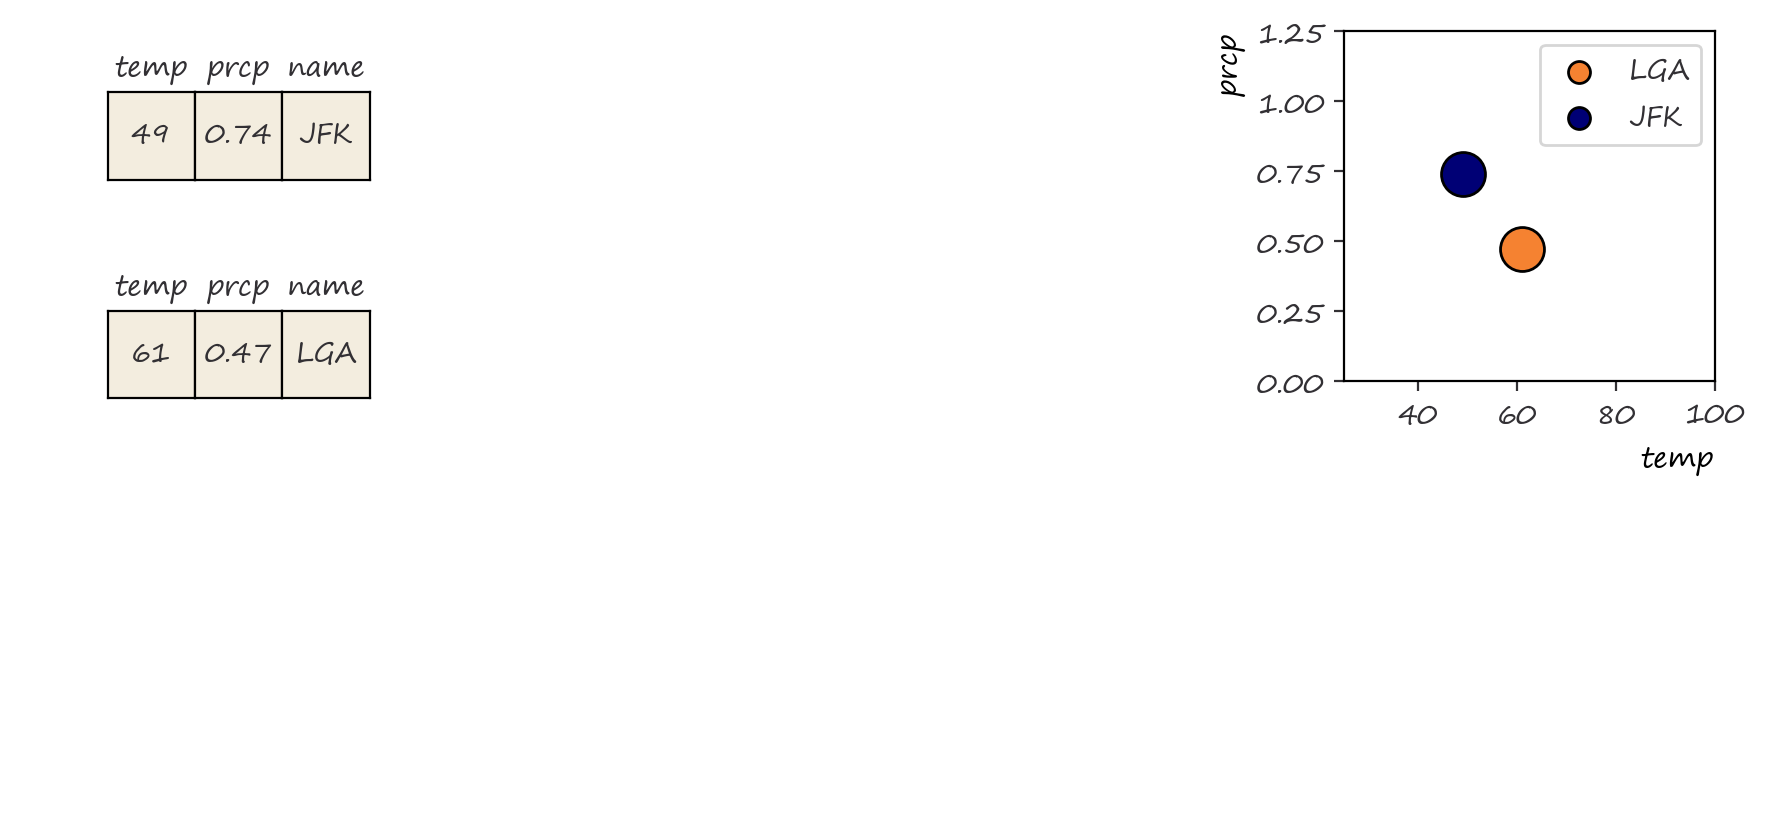

In [37]:
#add forwards arrows
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', label=None)
dg.table(axd, dtwo)

fig.savefig(spath/"intro02a.png", facecolor='white', bbox_inches='tight')


plt.show()

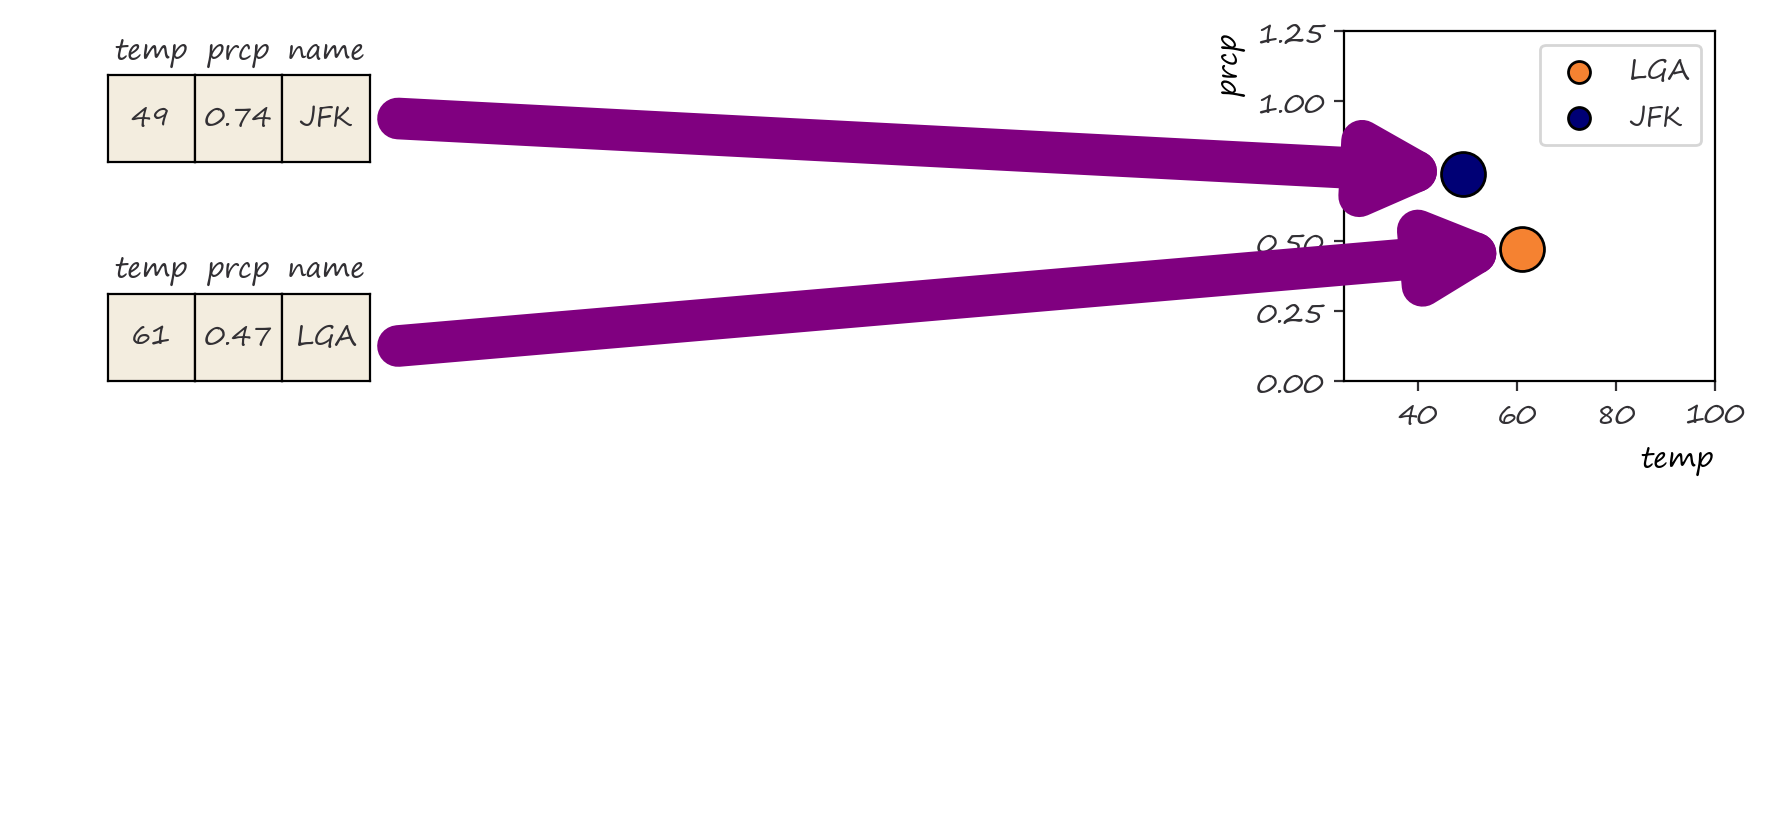

In [131]:
#add forwards arrows
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', label=None)
dg.table(axd, dtwo)

for (yt, xi, yi) in zip([.1, .75],x,y):
    darrow = mpatches.ConnectionPatch(xyA=(1.08, yt), coordsA=axd['E'].transAxes, 
                                      xyB=(xi, yi), coordsB=axd['H'].transData, 
                                      mutation_scale=50, arrowstyle='-|>', 
                                     lw=15, color=dg.acolor)
    fig.add_artist(darrow)

fig.savefig(spath/"intro02b.png", facecolor='white', bbox_inches='tight')


plt.show()

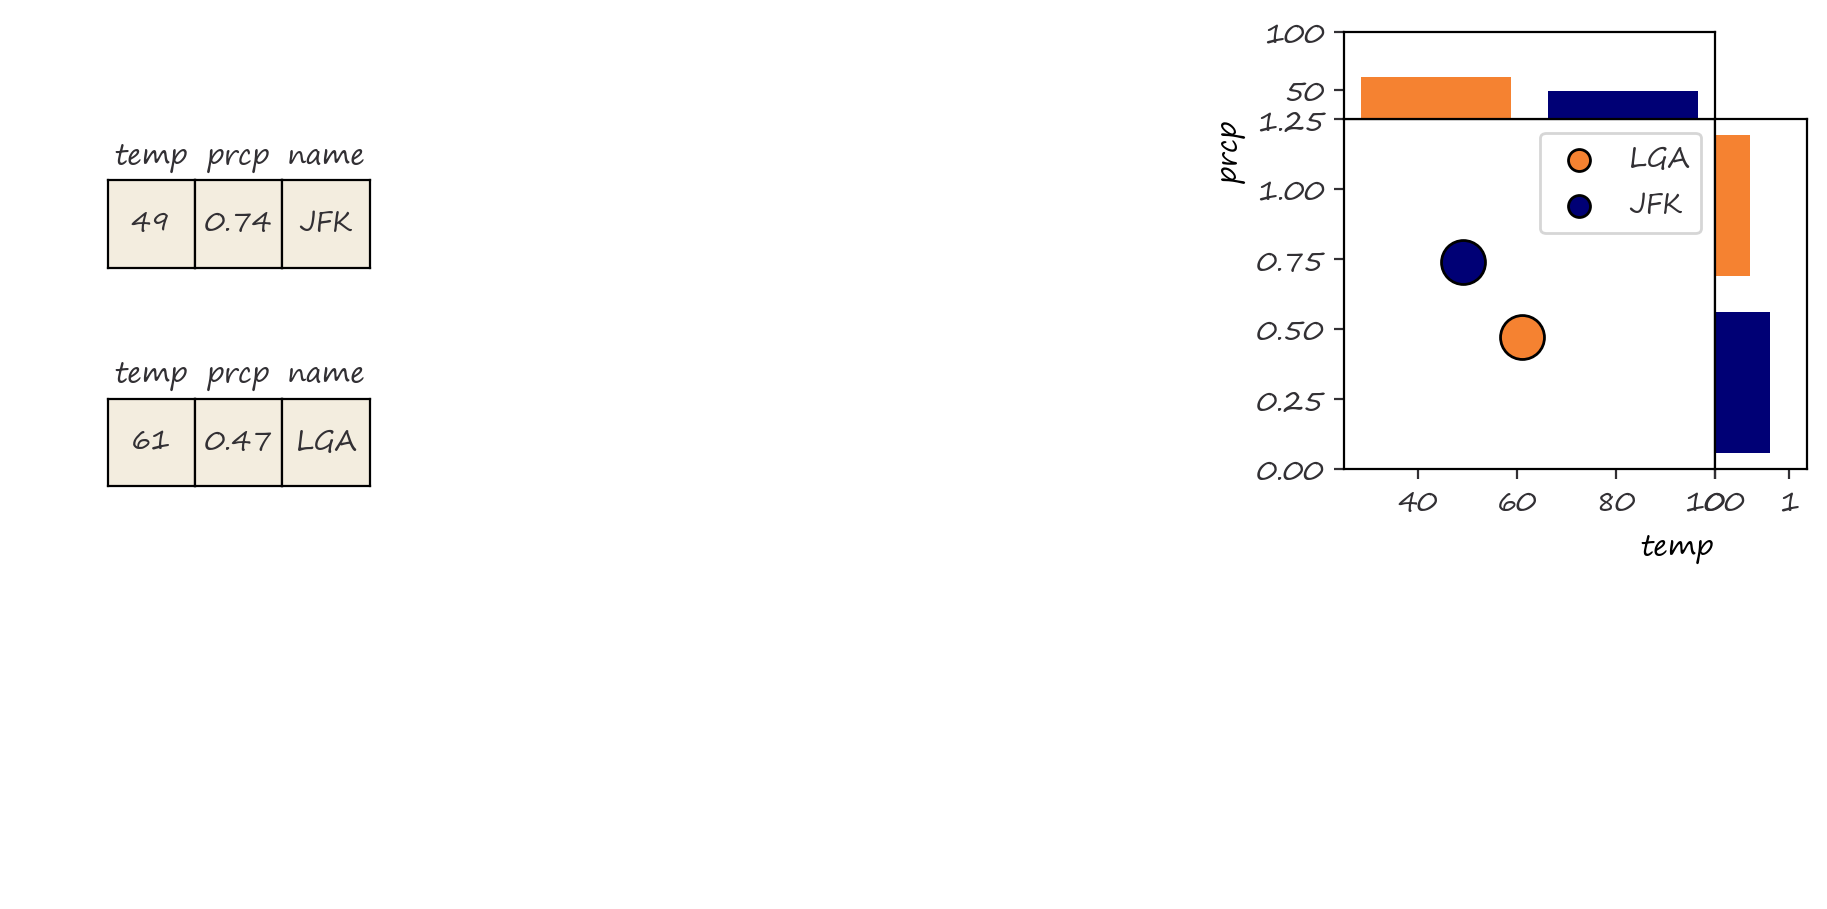

In [95]:
#add forwards arrows + hist
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', label=None)
axbx = axd['H'].inset_axes([0,1,1,.25], 
                           transform=axd['H'].transAxes, facecolor='white')
axby = axd['H'].inset_axes([1,0,.25,1], 
                           transform=axd['H'].transAxes, facecolor='white')
axbx.bar([0,1], x, color=[dg.station_color[ci] for ci in c])
axby.barh([0,1], y[::-1], color=[dg.station_color[ci] for ci in c][::-1])
axbx.set(xticks=[], ylim=(25, 100))
axby.set(yticks=[], xlim=(0, 1.25))
 
    
dg.table(axd, dtwo)
fig.savefig(spath/"intro03.png", facecolor='white', bbox_inches='tight')


plt.show()

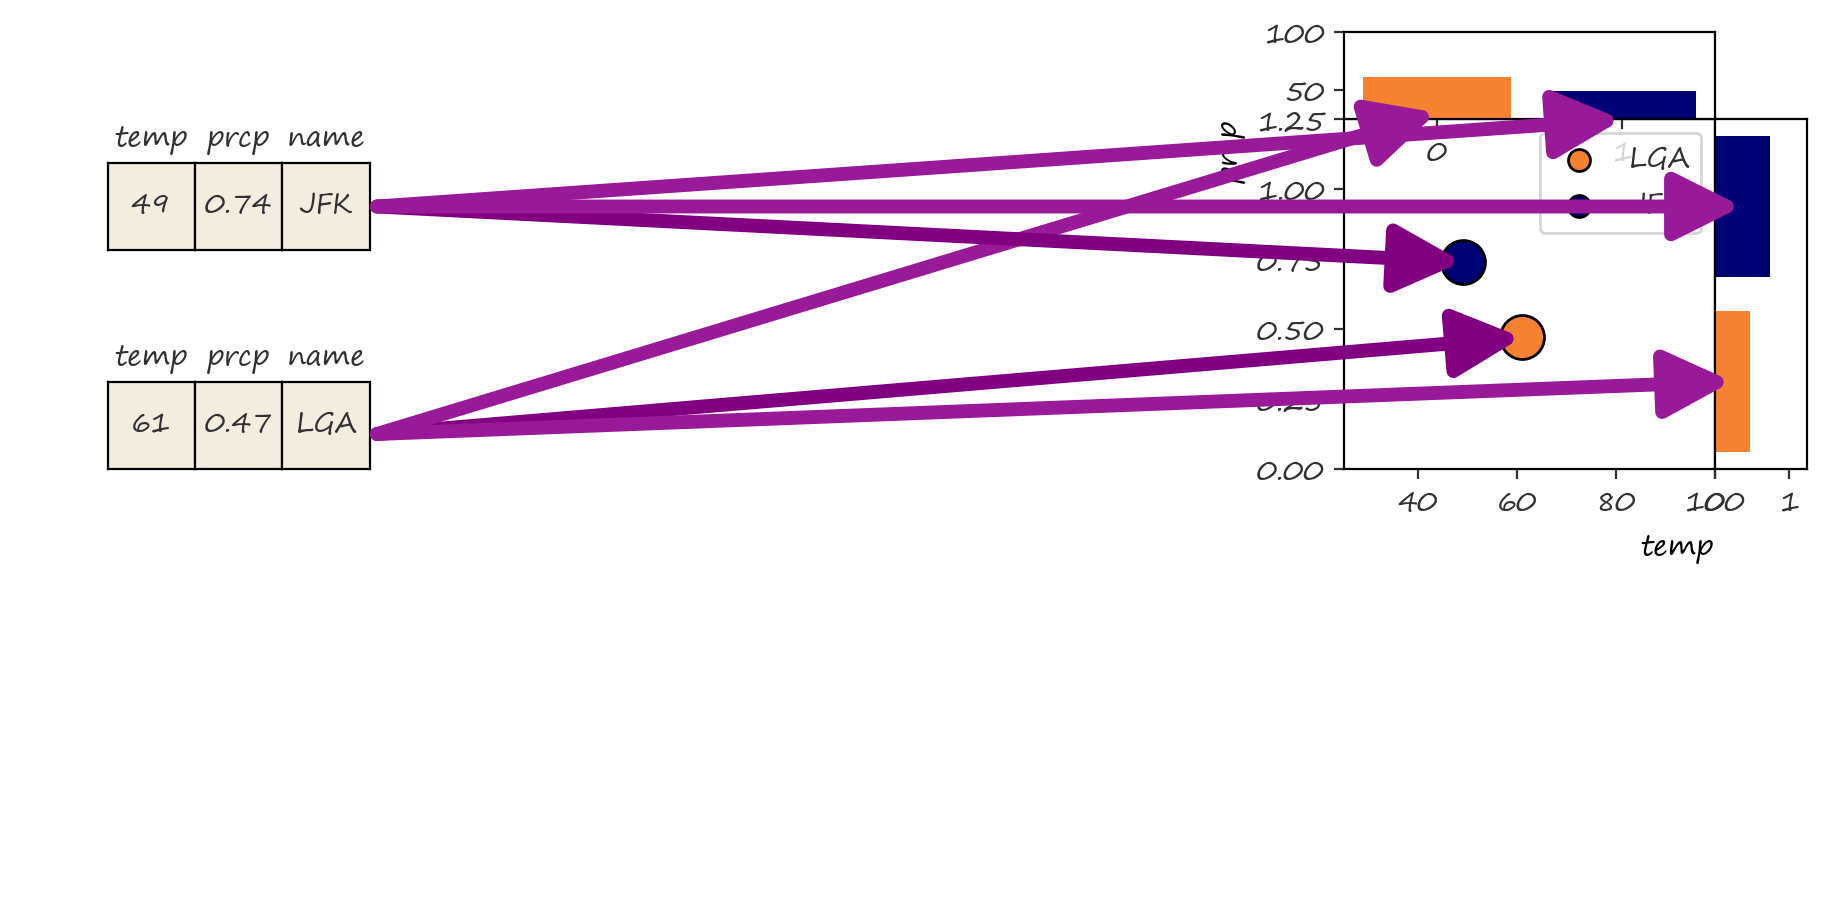

In [136]:

    fig, axd = dg.make_figure(artist=False, section=False,
                              visual=False, continuity=False, 
                              data=False, values=dtwo, 
                              plot_type='scatter', label=None)
    axbx = axd['H'].inset_axes([0,1,1,.25], 
                               transform=axd['H'].transAxes, facecolor='white')
    axby = axd['H'].inset_axes([1,0,.25,1], 
                               transform=axd['H'].transAxes, facecolor='white')
    
 
    
    axbx.set(xticks=[0,1], xlim=(-.5, 1.5), ylim=(25, 100))
    axby.set(yticks=[0,1], ylim=(-.5, 1.5), xlim=(0, 1.25))


    dg.table(axd, dtwo)
    larrow = '#991A99'
    for i, (yt, xi, yi, ci) in enumerate(zip([.1, .75],x, y, c)):
        axbx.bar(i, xi, facecolor= dg.station_color[ci])
        axby.barh(i, yi, facecolor=dg.station_color[ci])
        darrow = mpatches.ConnectionPatch(xyA=(1.02, yt), coordsA=axd['E'].transAxes, 
                                          xyB=(xi, yi), coordsB=axd['H'].transData, 
                                          mutation_scale=50, arrowstyle='-|>', 
                                         lw=5, color=dg.acolor)
        fig.add_artist(darrow)
        xbarrow = mpatches.ConnectionPatch(xyA=(1.02, yt), coordsA=axd['E'].transAxes, 
                                          xyB=(i, xi/2), coordsB=axbx.transData, 
                                          mutation_scale=50, arrowstyle='-|>', 
                                         lw=5, color=larrow)
        fig.add_artist(xbarrow)
        ybarrow = mpatches.ConnectionPatch(xyA=(1.02, yt), coordsA=axd['E'].transAxes, 
                                          xyB=(yi/2, i), coordsB=axby.transData, 
                                          mutation_scale=50, arrowstyle='-|>', 
                                         lw=5, color=larrow)
        fig.add_artist(ybarrow)

    fig.savefig(spath/f"intro03c.png", facecolor='white', bbox_inches='tight')
    plt.show()

In [ ]:
for i, (yt, xi, yi, ci) in enumerate(zip([.1, .75],x, y, c)):
    fig, axd = dg.make_figure(artist=False, section=False,
                              visual=False, continuity=False, 
                              data=False, values=dtwo, 
                              plot_type='scatter', label=None)
    axbx = axd['H'].inset_axes([0,1,1,.25], 
                               transform=axd['H'].transAxes, facecolor='white')
    axby = axd['H'].inset_axes([1,0,.25,1], 
                               transform=axd['H'].transAxes, facecolor='white')
    
    axbx.bar(i, xi, facecolor= dg.station_color[ci])
    axby.barh(i, yi, facecolor=dg.station_color[ci])
    
    axbx.set(xticks=[0,1], xlim=(-.5, 1.5), ylim=(25, 100))
    axby.set(yticks=[0,1], ylim=(-.5, 1.5), xlim=(0, 1.25))


    dg.table(axd, dtwo)
    larrow = '#991A99'

    darrow = mpatches.ConnectionPatch(xyA=(1.02, yt), coordsA=axd['E'].transAxes, 
                                      xyB=(xi, yi), coordsB=axd['H'].transData, 
                                      mutation_scale=50, arrowstyle='-|>', 
                                     lw=5, color=dg.acolor)
    fig.add_artist(darrow)
    xbarrow = mpatches.ConnectionPatch(xyA=(1.02, yt), coordsA=axd['E'].transAxes, 
                                      xyB=(i, xi/2), coordsB=axbx.transData, 
                                      mutation_scale=50, arrowstyle='-|>', 
                                     lw=5, color=larrow)
    fig.add_artist(xbarrow)
    ybarrow = mpatches.ConnectionPatch(xyA=(1.02, yt), coordsA=axd['E'].transAxes, 
                                      xyB=(yi/2, i), coordsB=axby.transData, 
                                      mutation_scale=50, arrowstyle='-|>', 
                                     lw=5, color=larrow)
    fig.add_artist(ybarrow)

    fig.savefig(spath/f"intro03{['a','b','c'][i-1]}.png", facecolor='white', bbox_inches='tight')
    plt.show()

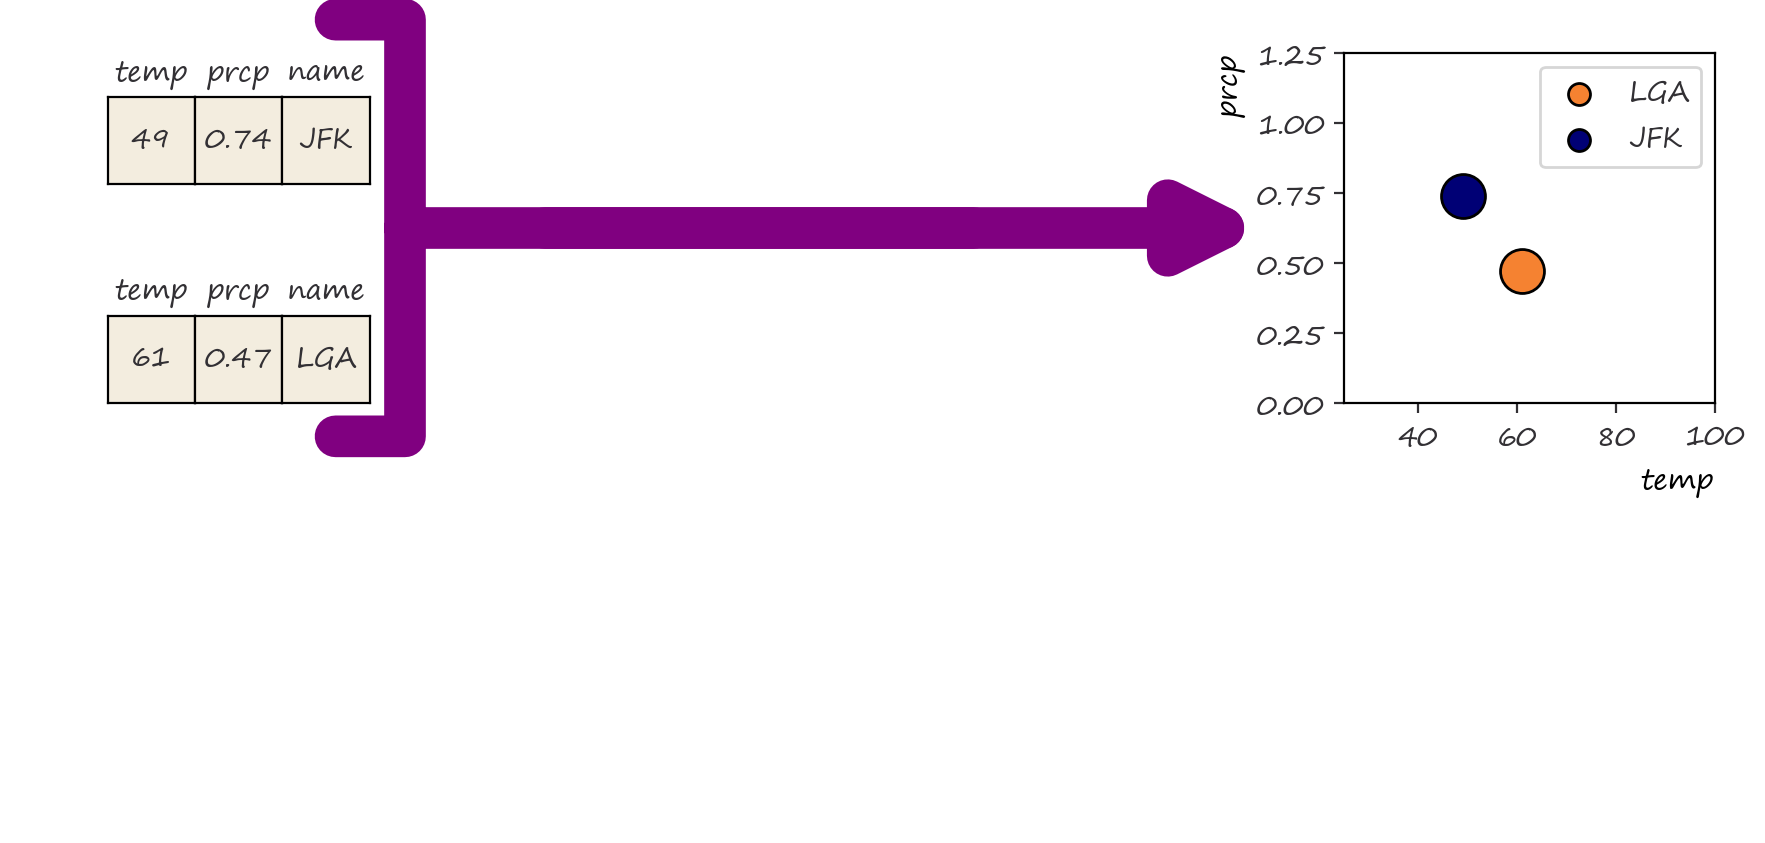

In [135]:
#add forwards arrows
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', label=None)
dg.table(axd, dtwo)


darrow1 = mpatches.ConnectionPatch(xyA=(1.5, .5), coordsA=axd['E'].transAxes, 
                                  xyB=(-.2, .5), coordsB=axd['H'].transAxes, 
                                  mutation_scale=50, arrowstyle='-|>', 
                                 lw=15, color=dg.acolor)
fig.add_artist(darrow1)
darrow2 = mpatches.ConnectionPatch(xyA=(1.1, .5), coordsA=axd['E'].transAxes, 
                                  xyB=(-1, .5), coordsB=axd['H'].transAxes, 
                                  mutation_scale=50, arrowstyle=']-,widthA=1.5,lengthA=.5', 
                                 lw=15, color=dg.acolor)
fig.add_artist(darrow2)


fig.savefig(spath/"intro03d.png", facecolor='white', bbox_inches='tight')


plt.show()

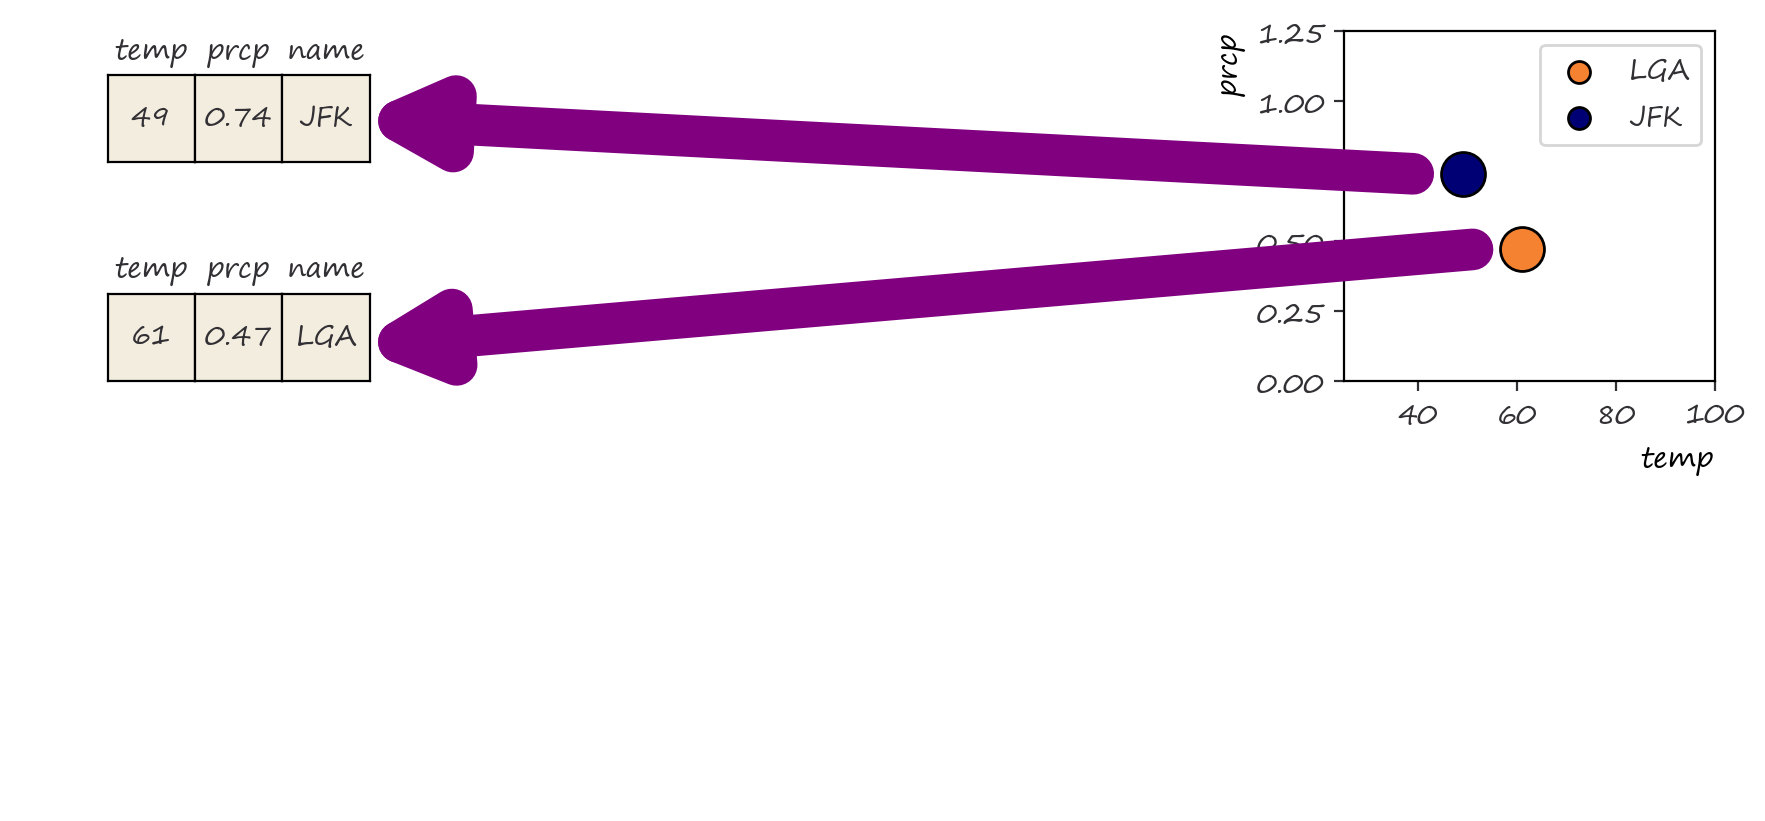

In [144]:
#add backwards arrows
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', label=None)
dg.table(axd, dtwo)
for (yt, xi, yi) in zip([.1, .75],x,y):
    darrow = mpatches.ConnectionPatch(xyB=(.95, yt), coordsB=axd['E'].transAxes, 
                                      xyA=(xi-10, yi), coordsA=axd['H'].transData, 
                                      mutation_scale=50, arrowstyle='-|>', 
                                     lw=15, color=dg.acolor)
    fig.add_artist(darrow)
    
fig.savefig(spath/"intro04.png", facecolor='white', bbox_inches='tight')


plt.show()

In [145]:
N = 50
xv = np.linspace(x[0], x[1], N)
yv = np.linspace(y[0], y[1], N)
cv = np.linspace(0, 1, N)
points = np.array([xv, yv]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
cmap = ch.get_continuous_cmap([dg.station_color[c[1]], dg.station_color[c[0]]])
norm = mcolors.BoundaryNorm(cv, cmap.N)

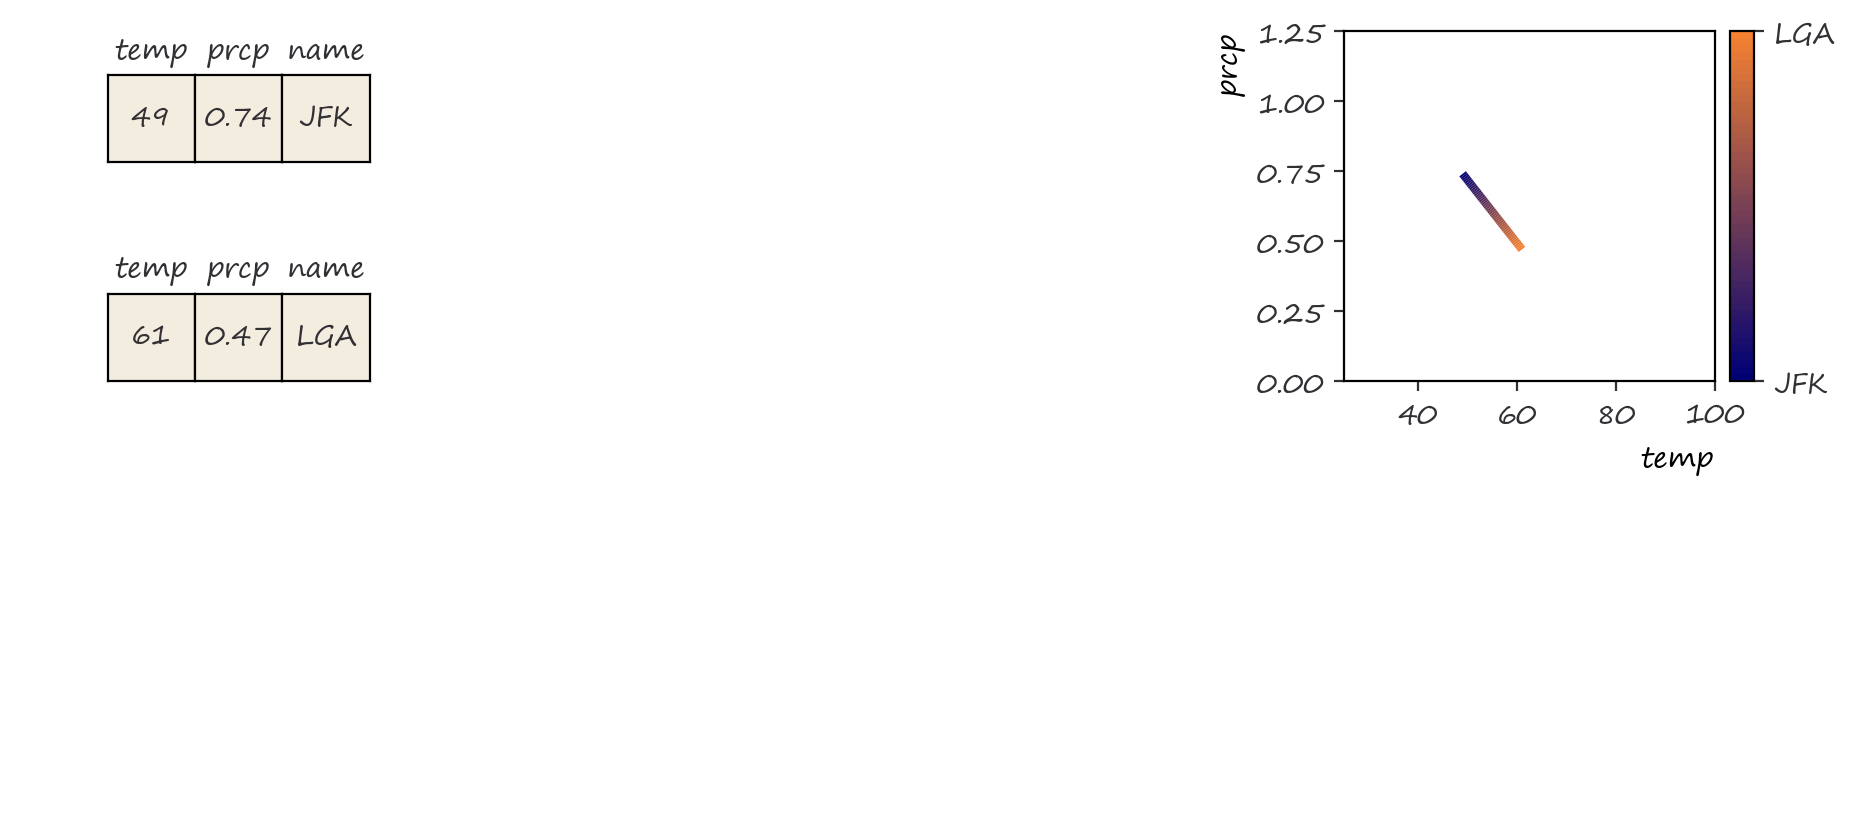

In [155]:
#same arrows as above + middle?
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='line', label=None)
dg.table(axd, dtwo)


lc = mcoll.LineCollection(segments, lw=3, cmap=cmap, norm=norm)
lc.set_array(cv[::-1])
line = axd['H'].add_collection(lc)
cax = axd['H'].inset_axes([103, 0, 5, 1.25], 
                          transform=axd['H'].transData)
cb = fig.colorbar(line, cax=cax, ticks=[0,1])
cb.set_ticklabels(['JFK', 'LGA'])
fig.savefig(spath/"intro05.png", facecolor='white', bbox_inches='tight')


plt.show()

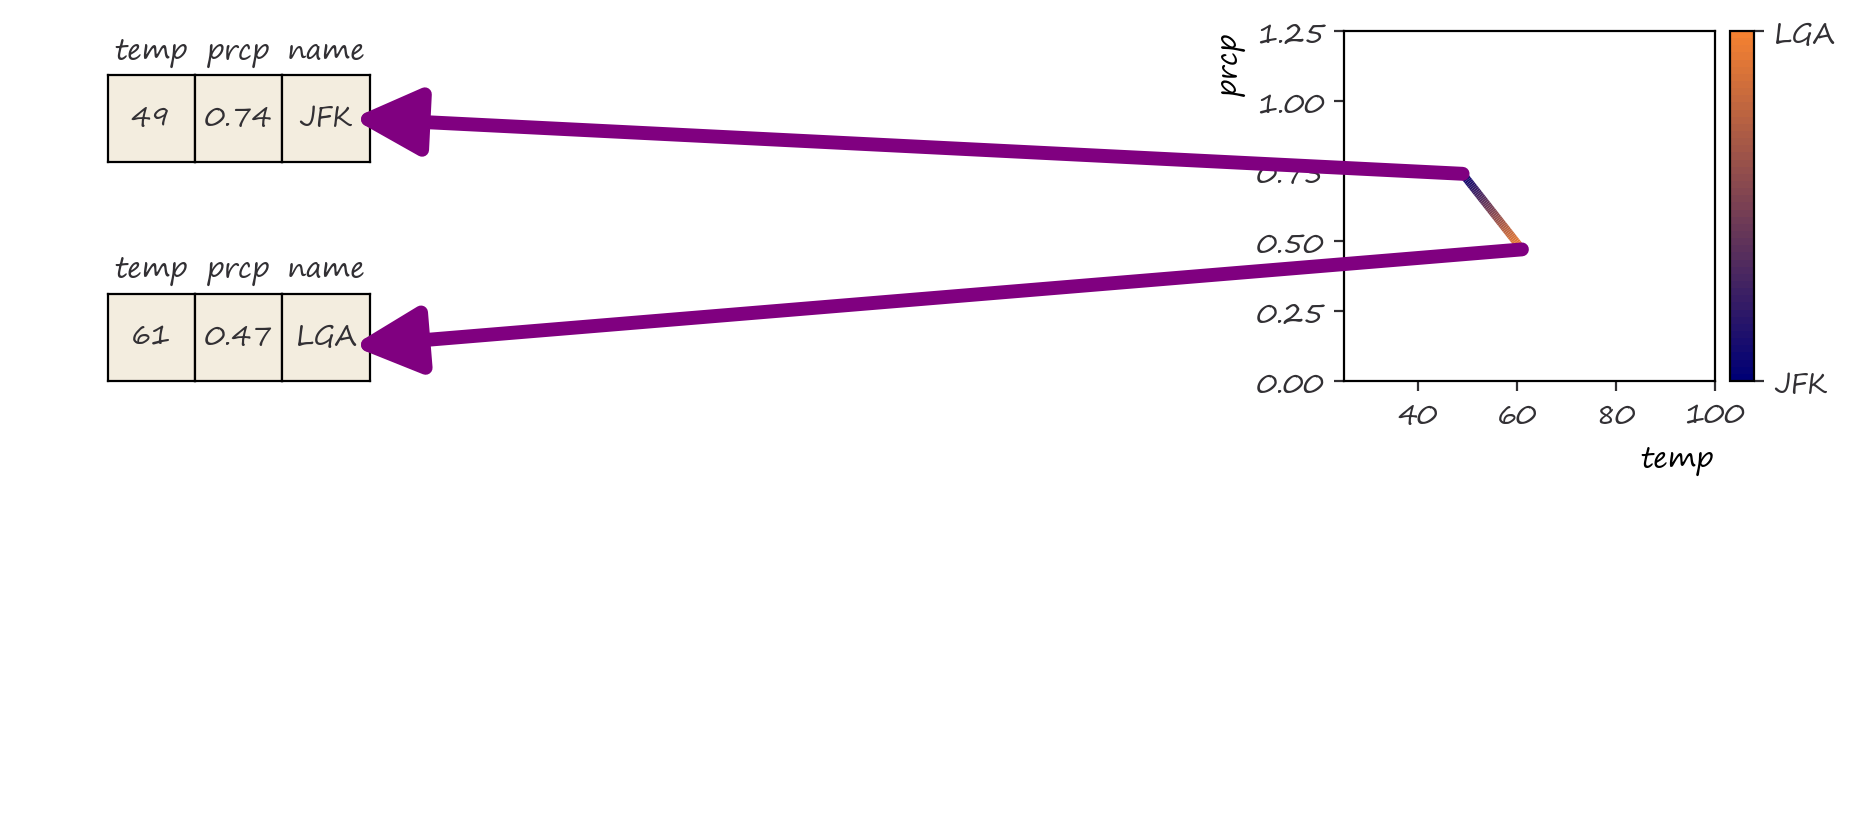

In [156]:
#same arrows as above + middle?
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='line', label=None)
dg.table(axd, dtwo)


lc = mcoll.LineCollection(segments, lw=3, cmap=cmap, norm=norm)
lc.set_array(cv[::-1])
line = axd['H'].add_collection(lc)
cax = axd['H'].inset_axes([103, 0, 5, 1.25], 
                          transform=axd['H'].transData)
cb = fig.colorbar(line, cax=cax, ticks=[0,1])
cb.set_ticklabels(['JFK', 'LGA'])
for (yt, xi, yi) in zip([.1, .75],x,y):
    darrow = mpatches.ConnectionPatch(xyB=(.95, yt), coordsB=axd['E'].transAxes, 
                                      xyA=(xi, yi), coordsA=axd['H'].transData, 
                                      mutation_scale=50, arrowstyle='-|>', 
                                     lw=5, color=dg.acolor)
    fig.add_artist(darrow)
fig.savefig(spath/"intro05a.png", facecolor='white', bbox_inches='tight')


plt.show()

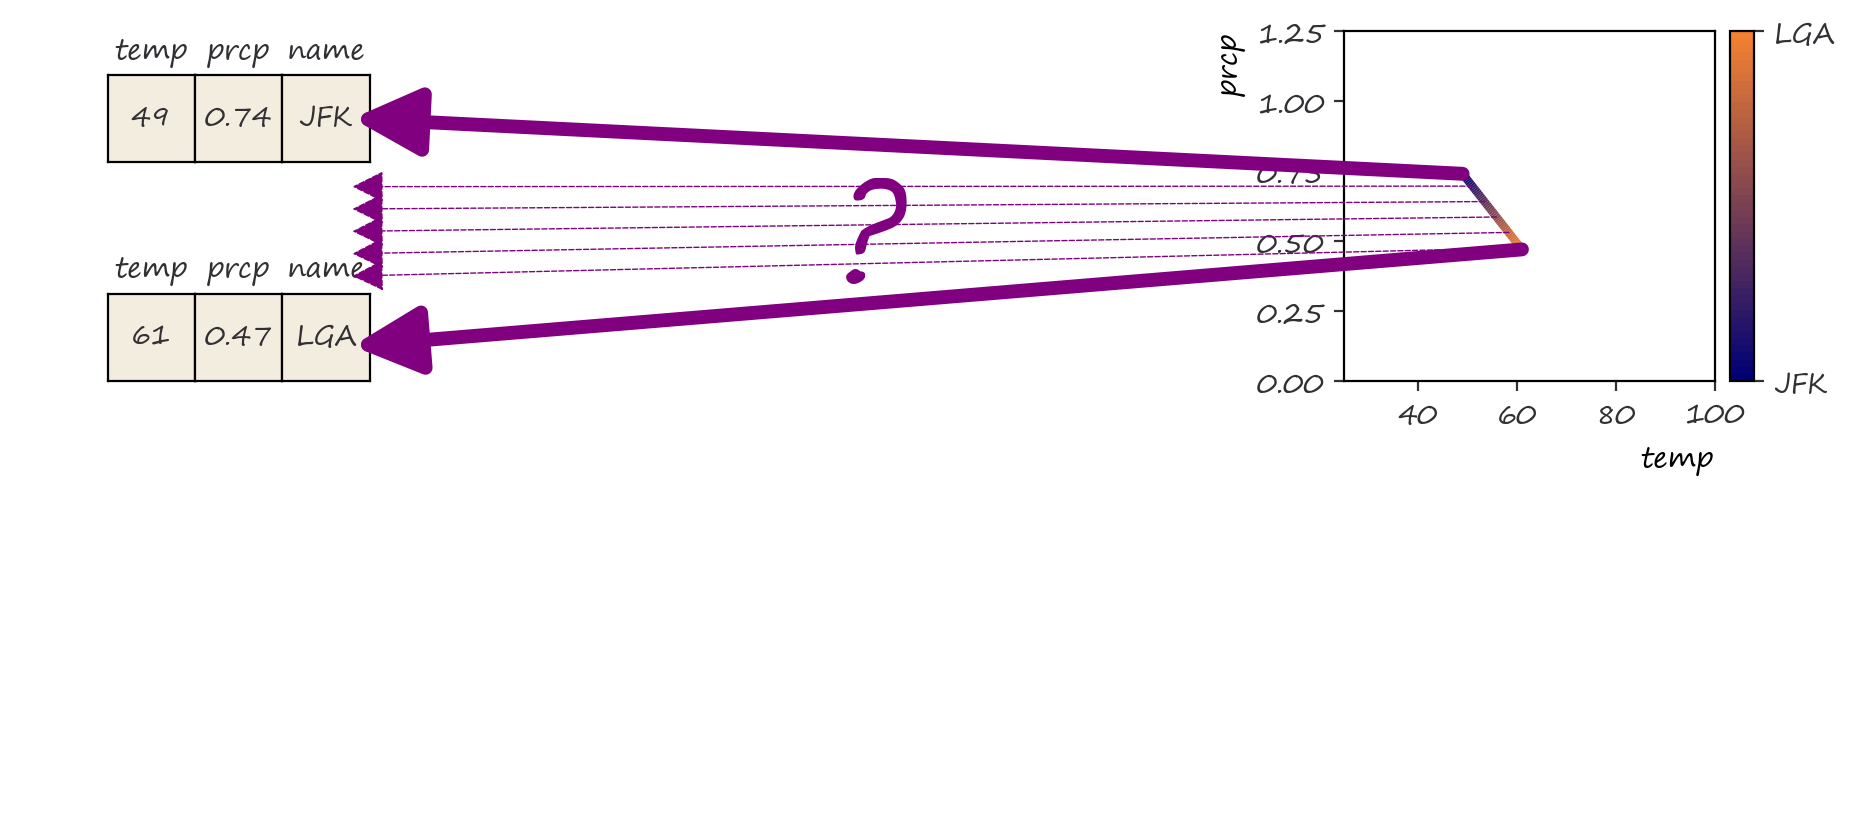

In [179]:
#same arrows as above + middle?
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='line', label=None)
dg.table(axd, dtwo)


lc = mcoll.LineCollection(segments, lw=3, cmap=cmap, norm=norm)
lc.set_array(cv[::-1])
line = axd['H'].add_collection(lc)
cax = axd['H'].inset_axes([103, 0, 5, 1.25], 
                          transform=axd['H'].transData)
cb = fig.colorbar(line, cax=cax, ticks=[0,1])
cb.set_ticklabels(['JFK', 'LGA'])
for (yt, xi, yi) in zip([.1, .75],x,y):
    darrow = mpatches.ConnectionPatch(xyB=(.95, yt), coordsB=axd['E'].transAxes, 
                                      xyA=(xi, yi), coordsA=axd['H'].transData, 
                                      mutation_scale=50, arrowstyle='-|>', 
                                     lw=5, color=dg.acolor)
    fig.add_artist(darrow)
    

step = 10
for (ytj, xj, yj) in zip(np.linspace(.3,.6, N-2)[::step], xv[1:-1:step], yv[1:-1:step]):
    
    darrow = mpatches.ConnectionPatch(xyB=(.95, ytj), coordsB=axd['E'].transAxes, 
                                      xyA=(xj, yj), coordsA=axd['H'].transData, 
                                      mutation_scale=25, arrowstyle='-|>', 
                                     lw=.5, linestyle='--', color=dg.acolor)
    fig.add_artist(darrow)
    
fig.text(.5, .63,"?", color=dg.acolor, fontsize=50 )
fig.savefig(spath/"intro0b.png", facecolor='white', bbox_inches='tight')


plt.show()

In [ ]:
#add forwards arrows
fig = plt.figure(facecolor='white', figsize=(11,10))
fig0, fig1 = fig.subfigures(2, 1, facecolor='white')

fig0, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', fig=fig0, label=None)
dg.table(axd, dtwo)
fig0.subplots_adjust(hspace=0)
fig1.subplots_adjust(hspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig(spath/"intro06.png", facecolor='white', bbox_inches='tight')

plt.show()

In [ ]:
dthree = []
for row in dtwo:
    d = dict(row)
    d['temp'] = d['temp']+ 25
    dthree.append(list(d.items()))
dthree

In [ ]:
#add equivariance arrows
fig = plt.figure(facecolor='white', figsize=(11,10))
fig0, fig1 = fig.subfigures(2, 1, facecolor='white')

fig0, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', fig=fig0, label=None)
dg.table(axd, dtwo)

fig1, axd1 = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dthree, 
                          plot_type='scatter', fig=fig1, label=None)
dg.table(axd1, dthree)

fig0.subplots_adjust(hspace=0)
fig1.subplots_adjust(hspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig(spath/"intro07.png", facecolor='white', bbox_inches='tight')


plt.show()

In [ ]:
done = [dtwo[0]]

In [ ]:
fig, axd = dg.make_figure(artist=False, section=False, 
                          visual=False, continuity=False, 
                          data=True, values=done, label=None)
fig.savefig(spath/"math01.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, axd = dg.make_figure(artist=False, section=False, 
                          visual=False, continuity=True, 
                          data=True, values=done, label=None)
fig.savefig(spath/"math02.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, axd = dg.make_figure(artist=False, section=True, 
                          visual=False, continuity=True,
                          data=True, values=done, 
                          label=['E', 'H'])
fig.savefig(spath/"math03.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, axd = dg.make_figure(artist=False, section=True, 
                          visual=True, continuity=True, 
                          data=data, values=done,
                          label=['E', 'V', 'H'])
fig.savefig(spath/"math04.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, axd = dg.make_figure(artist=True, section=True,
                          visual=True, continuity=True, 
                          data=True, values=done, 
                          label=['E', 'V', 'H'])
fig.savefig(spath/"math05.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, axd = dg.make_figure(artist=True, section=True, 
                          visual=True, continuity=True, 
                          data=True, values=done,
                          label=['E', 'V', 'V*', 'H'])
fig.savefig(spath/"math06.png", facecolor='white', bbox_inches='tight')
plt.show()